In [7]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectPercentile

In [8]:
# Load data into dataframe and check out the dimension of the data
df = pd.read_csv("C:/DSC680/Project2/divorce.csv", sep=';')
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (170, 55)


In [9]:
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [10]:
# I have categorical features and a binary target, I choose to evaluate the chi-square statistic to identify 
# independent variables for removal during feature selection

# retrieve numpy array
csDat = df.values

# Identify data and target features
features = csDat[:, :-1]
target = csDat[:,-1]

In [11]:
# After EDA, feature selection, and model selection, I decided to come back to this section and change it to keep 
# the top 25% performing features instead of the top 75% as was done in case study parts 2 & 3. 
# Since my features are quantitative, I decided to use f_classif to calculate ANOVA F-value statistic for each feature 
# and the target and identify a percentile of best features.

# Select top 25% of features with highest F-values
fvalue_selector = SelectPercentile(f_classif, percentile=25)
features_kbest = fvalue_selector.fit_transform(features, target)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 54
Reduced number of features: 14


In [12]:
# Create a whole features dataset that can be used for train and validation data splitting

# Only include the top 25% of features that were identified using KBest 
data_model_X = df[["Atr5", "Atr9", "Atr11", "Atr17", "Atr18", "Atr19", "Atr20",
                  "Atr23", "Atr29", "Atr33", "Atr35", "Atr36", "Atr38", "Atr40"]]

In [13]:
data_model_X.head()

,Atr5,Atr9,Atr11,Atr17,Atr18,Atr19,Atr20,Atr23,Atr29,Atr33,Atr35,Atr36,Atr38,Atr40
0,0,0,1,0,0,0,1,0,0,1,0,1,1,3
1,4,4,4,4,4,3,2,0,1,2,0,2,4,4
2,1,1,3,3,3,3,2,1,3,1,1,1,1,3
3,3,3,4,3,3,3,4,1,1,2,1,1,3,4
4,1,0,0,1,1,2,1,0,1,1,0,0,0,1


In [14]:
# Label values for the target class
data_model_y = df['Class'].replace({'Married': {1: 'Married', 0: 'Divorced'}})
data_model_y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [15]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

In [16]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [17]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  119
No. of samples in validation set: 51


In [18]:
# Married and Divorced
print('\n')
print('No. of married and divorced in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of married and divorced in the validation set:')
print(y_val.value_counts())



No. of married and divorced in the training set:
1    60
0    59
Name: Class, dtype: int64


No. of married and divorced in the validation set:
0    27
1    24
Name: Class, dtype: int64


In [19]:
# Okay, now I'm ready to select a model. Since I have a classification problem and not very many observations, I am 
# choosing to use the RandomForestClassifier
# Import libraries
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ConfusionMatrix

# Create the model
model = RandomForestClassifier(random_state=0, n_jobs=-1)

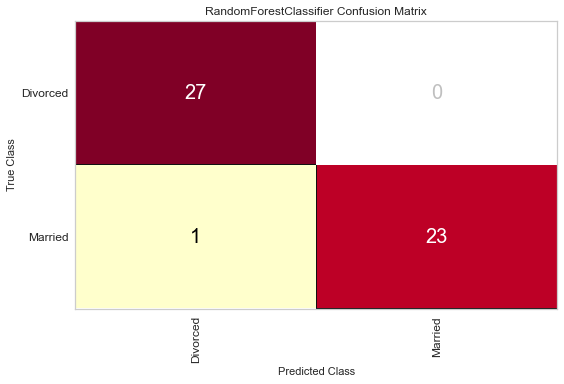

In [20]:
# fit the model and view confusion matrix results
classes = ['Divorced','Married']
cm = ConfusionMatrix(model, classes=classes, percent=False)
cm.fit(X_train, y_train)

# Use the test data to make predictions and score the results
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

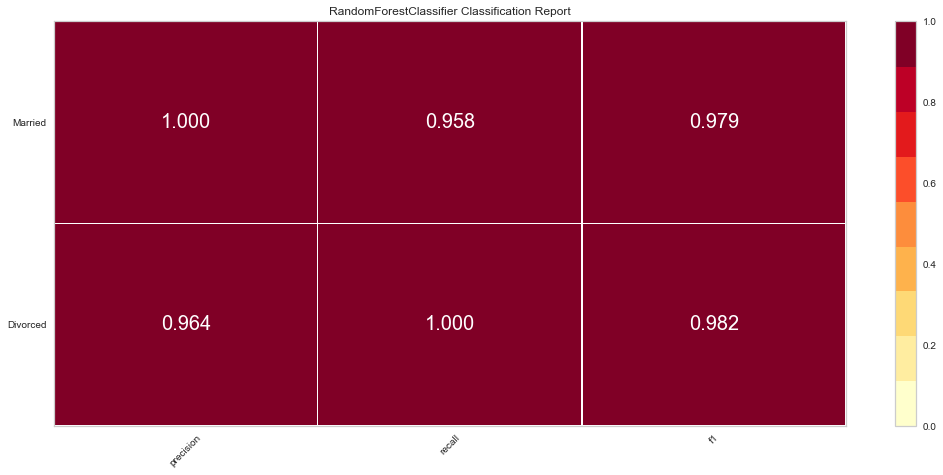

In [21]:
# Check the Precision, Recall, and F1 Score
%matplotlib inline

# import libraries
from yellowbrick.classifier import ClassificationReport

# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

***Use RandomizedSearchCV to narrow down the range of hyperparameters***

In [22]:
# Look at parameters used by our current forest
from pprint import pprint

print('Parameters currently in use:\n')
pprint(model.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


In [25]:
# Create parameter grid to sample
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [26]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 10,
                               cv = 2, verbose=2, random_state=0, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.0min finished


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=0, verbose=2)

In [27]:
# View best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 40,
 'bootstrap': False}

In [28]:
# Evaluate if the random search provided a better model than the base model

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

# base model fit and evaluate
base_model = model
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_val, y_val)

# best model fit and evaluate
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_val, y_val)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0196 degrees.
Accuracy = 95.83%.
Model Performance
Average Error: 0.0196 degrees.
Accuracy = 95.83%.
Improvement of 0.00%.


In [29]:
# Use the parameter identified from random search to define ranges for grid search
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30, 40, 50, 60],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 400, 600, 1000]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [30]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 20.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 28.2min finished


{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 100}

In [31]:
# Evaluate if the parameters given by grid search are better than the base model
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_val, y_val)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0392 degrees.
Accuracy = 91.67%.
Improvement of -4.35%.


In [32]:
# Since there was a negative effect on model performance with the random search/grid search parameters, I decided to run a 
# grid search again, but test out parameters surrounding the default parameters, since those are scoring so high.

# Create the parameter grid based on default parameters
param_grid = {
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [1, 2, 3],
    'n_estimators': [80, 90, 95,100, 105, 110]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [33]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   38.3s
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  1.6min finished


{'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 80}

In [34]:
# Evaluate if the parameters given by grid search are better than the base model
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_val, y_val)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.0196 degrees.
Accuracy = 95.83%.
Improvement of 0.00%.


In [35]:
# Don't know if we can do any better than the default which seems to have topped out precision scores. Really, this model
# works great. Perhaps, I could play around a bit with feature selection to see if I can improve my model.

# Try recursively elimiating features from dataset 
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=model, step=1, scoring='accuracy')
rfecv.fit(features, target)
rfecv.transform(features)

array([[1, 0, 0, 1, 3],
       [4, 4, 4, 2, 4],
       [3, 3, 3, 2, 3],
       [4, 3, 3, 4, 4],
       [0, 1, 1, 1, 1],
       [0, 2, 1, 1, 2],
       [2, 3, 3, 2, 3],
       [4, 2, 3, 1, 4],
       [3, 3, 3, 3, 2],
       [3, 1, 2, 0, 2],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [3, 3, 4, 4, 4],
       [3, 3, 4, 4, 4],
       [3, 3, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 4],
       [4, 4, 4, 4, 3],
       [3, 3, 3, 3, 4],
       [4, 4, 4, 4, 3],
       [4, 4, 3, 3, 4],
       [4, 4, 3, 3, 4],
       [3, 3, 4, 4, 3],
       [3, 3, 3, 3, 4],
       [4, 4, 2, 2, 4],
       [3, 3, 3, 3, 4],
       [3, 3, 3, 3, 4],
       [3, 3, 3, 3, 4],
       [3, 3, 4, 4, 4],
       [4, 4, 3, 3, 4],
       [3, 3, 4, 4, 4],
       [4, 4, 3, 3, 3],
       [4, 4, 3, 3, 3],
       [3, 3, 4, 4, 4],
       [3, 3, 4, 4, 3],
       [3, 3, 3, 3, 4],
       [4, 4, 3, 3, 4],
       [4, 3, 3, 3, 4],
       [4, 3, 3, 3, 4],
       [4, 4, 3, 3, 3],
       [3, 3, 2, 2, 4],
       [4, 4, 2,

In [36]:
# Look at the number of features rfecv says to keep
rfecv.n_features_

5

In [37]:
# View the array of features to keep
rfecv.support_

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [38]:
# Rank features best (1) to worst
rfecv.ranking_

array([19, 20, 15, 28, 18, 36, 45, 16,  3, 27,  1, 13, 34,  7,  6,  5,  1,
        1,  4,  1, 35, 44, 48, 38, 10,  2, 41, 12, 25,  9, 21, 23, 31, 29,
       43,  8, 24, 46, 11,  1, 14, 30, 42, 17, 39, 32, 49, 40, 22, 37, 47,
       33, 26, 50])

In [39]:
# Each of these features was in the KBest top 25%
# Now I will run through the same code using only the best 5 features to create a whole features dataset 
# that can be used for train and validation data splitting

# Only include the top 25% of features that were identified using KBest 
features1 = df[["Atr11", "Atr17", "Atr18", "Atr20", "Atr40"]]
target1 = df['Class'].replace({'Married': {1: 'Married', 0: 'Divorced'}})

In [40]:
# Split the new data
feat_train, feat_test, target_train, target_test = train_test_split(features1, target1, test_size =0.3, random_state=11)

In [41]:
# Create the model
model = RandomForestClassifier(random_state=0, n_jobs=-1)

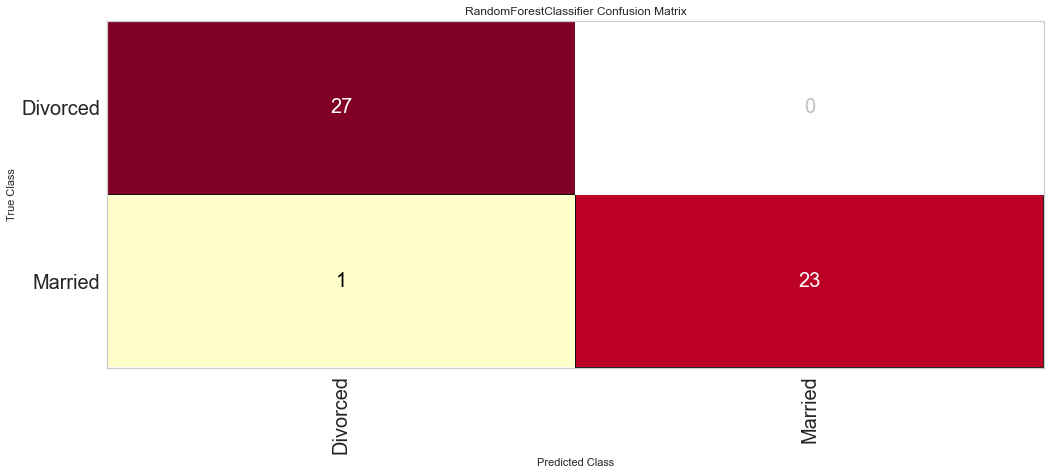

In [42]:
# fit the model and view confusion matrix results
classes = ['Divorced','Married']
cm = ConfusionMatrix(model, classes=classes, percent=False)
cm.fit(feat_train, target_train)

# Use the test data to make predictions and score the results
cm.score(feat_test, target_test)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

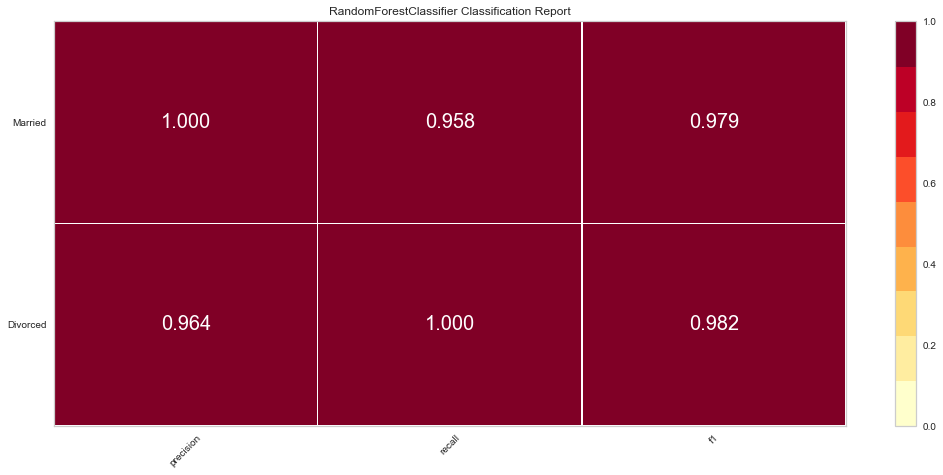

In [43]:
# Check the Precision, Recall, and F1 Score
%matplotlib inline

# import libraries
from yellowbrick.classifier import ClassificationReport

# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(feat_train, target_train)  # Fit the training data to the visualizer
visualizer.score(feat_test, target_test)  # Evaluate the model on the test data
g = visualizer.poof()